# Assignment Task
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

# Dataset Description:
The dataset consists of the following variables:
* Age: Age in years
* KM: Accumulated Kilometers on odometer
* FuelType: Fuel Type (Petrol, Diesel, CNG)
* HP: Horse Power
* Automatic: Automatic ( (Yes=1, No=0)
* CC: Cylinder Volume in cubic centimeters
* Doors: Number of doors
* Weight: Weight in Kilograms
* Quarterly_Tax:
* Price: Offer Price in EUROs

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the csv file into a dataframe variable
toyota = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
toyota

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


# Tasks
##1. Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [ ]:
toyota.info()
# Only 'Fuel_Type' is in the object dtype
# Other columns are of int64 dtype
# We can cleary see that there are no null values present
# In total there are 11 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
toyota.describe()
# We can see that outliers maybe present in some columns and some of the columns has a very low variance
# 'Cylinders' has 0 variance
# 'KM' has very high variance and even many outliers

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
toyota.duplicated().sum()
# There is one duplicate value present

1

In [ ]:
toyota[toyota.duplicated(keep = False)]
# These two rows have the same values respective to the all columns

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [ ]:
# Dropping the duplicates
toyota.drop_duplicates(inplace=True)
toyota.duplicated().sum()
# Now there are no duplicate rows present

0

In [ ]:
# Checking the null values
toyota.isna().sum()
# No null values present

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [ ]:
toyota['Cylinders'].value_counts()
# This column has no effect on the model as it has only one value in all the rows

Cylinders
4    1435
Name: count, dtype: int64

In [ ]:
# Dropping the column as it has 0 variance
toyota.drop(columns=['Cylinders'], inplace=True)

In [ ]:
toyota.head()
# Column has been removed

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [ ]:
# Column name 'Age_08_04' is quite long so we have to rename it
toyota.rename(columns = {'Age_08_04' : 'Age'}, inplace=True)
toyota.head()
# Column Name has been Renamed

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


<Axes: >

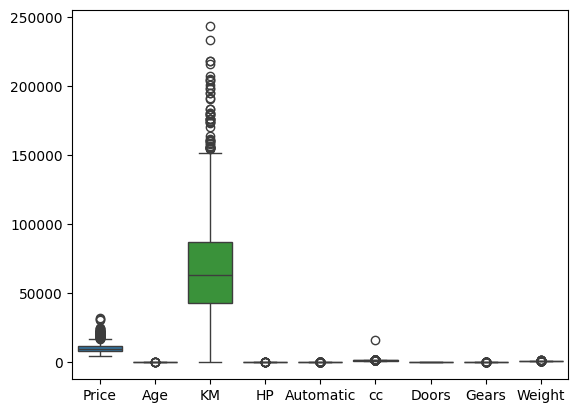

In [ ]:
# Outliers Detection
sns.boxplot(toyota)
# Almost every column has the outliers
# Price and KM has very high number of outliers

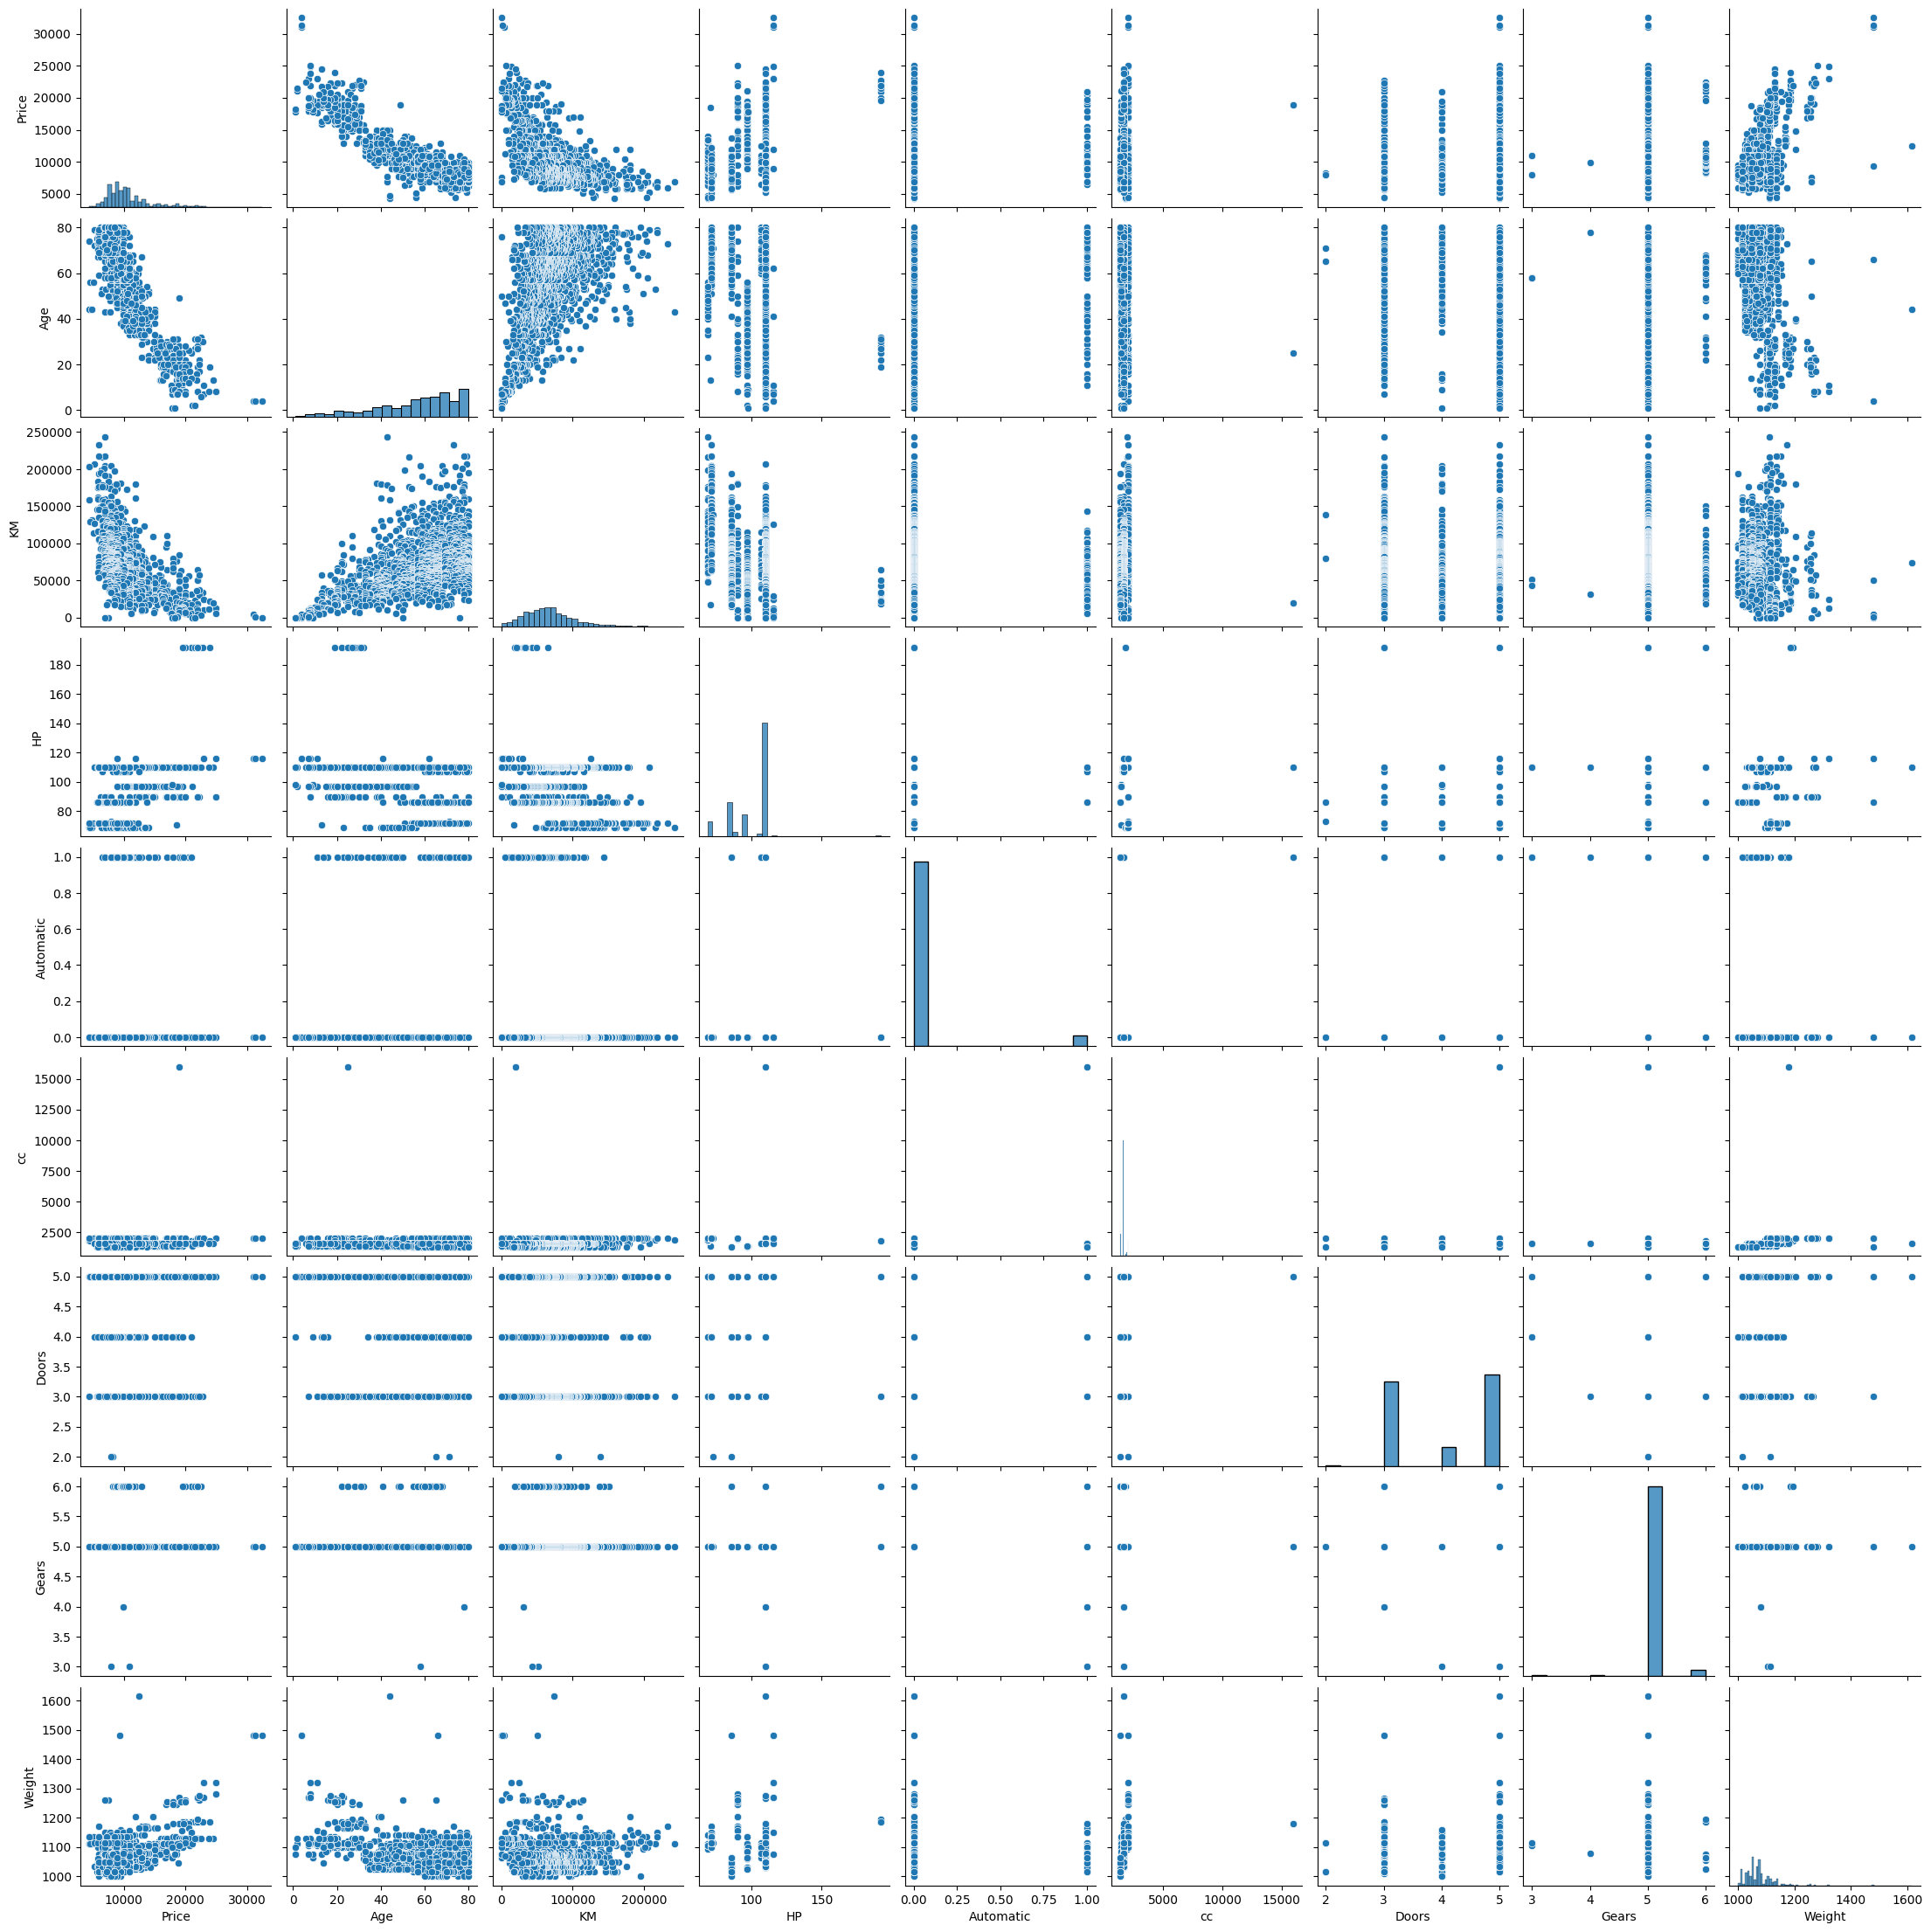

In [ ]:
sns.pairplot(toyota)
# Some of the columns has a moderate correlation and most of the columns has scatterness wrt each other

<Axes: >

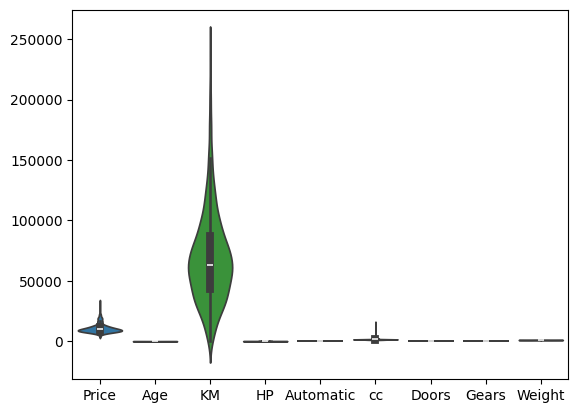

In [ ]:
sns.violinplot(toyota)

In [ ]:
toyota.corr(numeric_only=True)
# Correlation matrix

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,0.063831,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,-0.160101,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,0.021238,1.000000


<Axes: >

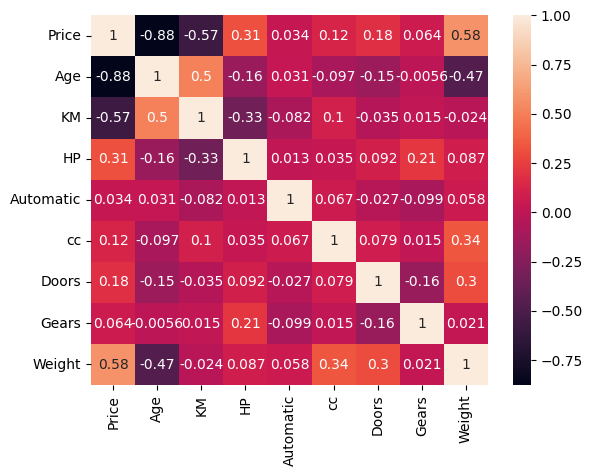

In [ ]:
sns.heatmap(toyota.corr(numeric_only=True), annot=True)
# Strong negative correlation between 'Age' and 'Price'
# Moderate positive correlation between 'Weight' and 'Price'
# Moderate positive correlation between 'KM' and 'Age'

In [ ]:
# Transformation of the categorical data
toyota = pd.get_dummies(data = toyota, columns =['Fuel_Type'], dtype='int64')
toyota.head()

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0


In [ ]:
# Standardization of the numeric data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
scaled_toyota = pd.DataFrame(ss.fit_transform(toyota), columns=toyota.columns)
scaled_toyota

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.770368,-1.777268,-0.575958,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.774964,-0.109493,2.884126,-2.718789
1,0.839669,-1.777268,0.116474,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.774964,-0.109493,2.884126,-2.718789
2,0.895109,-1.723380,-0.716707,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.774964,-0.109493,2.884126,-2.718789
3,1.172311,-1.615603,-0.548902,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.774964,-0.109493,2.884126,-2.718789
4,0.839669,-1.400049,-0.802384,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.870688,-0.109493,2.884126,-2.718789
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,-0.892845,0.701602,-1.281492,-1.034441,-0.242983,-0.651898,-1.084443,-0.140475,-0.905299,-0.109493,-0.346726,0.367811
1431,0.034396,0.863267,-1.322689,-1.034441,-0.242983,-0.651898,-1.084443,-0.140475,-1.096747,-0.109493,-0.346726,0.367811
1432,-0.615643,0.809379,-1.375627,-1.034441,-0.242983,-0.651898,-1.084443,-0.140475,-1.096747,-0.109493,-0.346726,0.367811
1433,-0.962145,0.755490,-1.378295,-1.034441,-0.242983,-0.651898,-1.084443,-0.140475,-1.096747,-0.109493,-0.346726,0.367811


##2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [ ]:
from sklearn.model_selection import train_test_split

# Here the dependent variable is price
# All the other columns are independent variable
X = scaled_toyota.iloc[:,1:]
Y = scaled_toyota.iloc[:,0]

# We are going to build 3 different models hence we are taking 3 different datasets
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X, Y, test_size=0.20, random_state=52)
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X, Y, test_size=0.20, random_state=22)

In [ ]:
# Creating 3 different training dataframes to put inside the function for models
train_df_1 = X_train_1.join(Y_train_1)
train_df_2 = X_train_2.join(Y_train_2)
train_df_3 = X_train_3.join(Y_train_3)

In [ ]:
# Creating 3 different testing dataframes to put inside the function for models
test_df_1 = X_test_1.join(Y_test_1)
test_df_2 = X_test_2.join(Y_test_2)
test_df_3 = X_test_3.join(Y_test_3)

##3. Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

#### Method OLS - Ordinary Least Squares for building the model
##### Assumptions:
1. Predictors are measured without any error
2. Predictors are linearly independent of each other
3. Error should follow the normal distribution
4. Error has zero mean


In [ ]:
# import formula api as alias smf
import statsmodels.formula.api as smf
model1 = smf.ols(formula='Price ~ Age + KM + HP + Automatic + cc + Doors + Gears + Weight +	Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol',
                 data=train_df_1).fit()
model2 = smf.ols(formula='Price ~ Age + KM + HP + Automatic + cc + Doors + Gears + Weight +	Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol',
                 data=train_df_2).fit()
model3 = smf.ols(formula='Price ~ Age + KM + HP + Automatic + cc + Doors + Gears + Weight +	Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol',
                 data=train_df_3).fit()

In [ ]:
model1.summary()
# R-squared value is 0.87 which means that the model is a good fit
# Equation : Y = -0.62*X1 - 0.17*X2 + 0.07*X3 + 0.02*X4 - 0.01*X5 - 0.02*X6 + 0.02*X7 + 0.38*X8 - 0.01*X9 - 0.07*X10 + 0.07*X11 + 0.001

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     765.0
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        04:21:27   Log-Likelihood:                -466.29
No. Observations:                1148   AIC:                             954.6
Df Residuals:                    1137   BIC:                             1010.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0011      0.011      0.099      0.921      -0.020       0.022
Age                 -0.6236      0.015    -41.754      0.000      -0.653      -0.594
KM                  -0.1662      0.015    -10.881      0.000      -0.196      -0.136
HP                   0.0667      0.017      4.025      0.000       0.034       0.099
Automatic            0.0171      0.012      1.465      0.143      -0.006       0.040
cc                  -0.0055      0.011     -0.517      0.605      -0.027       0.015
Doors               -0.0233      0.012     -1.947      0.052      -0.047       0.000
Gears                0.0238      0.012      1.983      0.048       0.000       0.047
Weight               0.3817      0.022     17.577      0.000       0.339       0.424
Fuel_Type_CNG       -0.0115      0.011     -1.059      0.290      -0.033       0.010
Fuel_Type_Diesel    -0.0662      0.013     -5.237      0.000      -0.091      -0.041
Fuel_Type_Petrol     0.0671      0.012      5.832      0.000       0.045       0.090
==============================================================================
Omnibus:                      231.718   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2442.134
Skew:                          -0.604   Prob(JB):                         0.00
Kurtosis:                      10.042   Cond. No.                     7.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.42e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
model2.summary()
# R-squared value is 0.869 which means that the model is a good fit
# Equation : Y = -0.62*X1 - 0.17*X2 + 0.06*X3 + 0.004*X4 - 0.01*X5 - 0.02*X6 + 0.04*X7 + 0.39*X8 - 0.02*X9 - 0.06*X10 + 0.07*X11 + 0.01

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     753.9
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        04:21:27   Log-Likelihood:                -479.53
No. Observations:                1148   AIC:                             981.1
Df Residuals:                    1137   BIC:                             1037.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0055      0.011      0.501      0.617      -0.016       0.027
Age                 -0.6179      0.015    -41.143      0.000      -0.647      -0.588
KM                  -0.1711      0.015    -11.231      0.000      -0.201      -0.141
HP                   0.0583      0.017      3.442      0.001       0.025       0.091
Automatic            0.0039      0.011      0.353      0.724      -0.018       0.026
cc                  -0.0054      0.011     -0.503      0.615      -0.027       0.016
Doors               -0.0239      0.012     -1.973      0.049      -0.048      -0.000
Gears                0.0373      0.011      3.318      0.001       0.015       0.059
Weight               0.3852      0.021     18.149      0.000       0.344       0.427
Fuel_Type_CNG       -0.0187      0.011     -1.703      0.089      -0.040       0.003
Fuel_Type_Diesel    -0.0621      0.013     -4.883      0.000      -0.087      -0.037
Fuel_Type_Petrol     0.0656      0.012      5.697      0.000       0.043       0.088
==============================================================================
Omnibus:                      222.217   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2520.783
Skew:                          -0.535   Prob(JB):                         0.00
Kurtosis:                      10.180   Cond. No.                     3.83e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.35e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
model3.summary()
# R-squared value is 0.865 which means that the model is a good fit
# Equation : Y = -0.64*X1 - 0.17*X2 + 0.28*X3 + 0.02*X4 - 0.52*X5 + 0.01*X6 + 0.03*X7 + 0.25*X8 - 0.01*X9 + 0.13*X10 - 0.11*X11 - 0.021

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     728.1
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        04:21:27   Log-Likelihood:                -463.66
No. Observations:                1148   AIC:                             949.3
Df Residuals:                    1137   BIC:                             1005.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0205      0.011     -1.875      0.061      -0.042       0.001
Age                 -0.6373      0.015    -42.468      0.000      -0.667      -0.608
KM                  -0.1652      0.015    -10.776      0.000      -0.195      -0.135
HP                   0.2788      0.026     10.585      0.000       0.227       0.330
Automatic            0.0225      0.011      2.043      0.041       0.001       0.044
cc                  -0.5243      0.071     -7.374      0.000      -0.664      -0.385
Doors                0.0107      0.012      0.901      0.368      -0.013       0.034
Gears                0.0268      0.011      2.416      0.016       0.005       0.049
Weight               0.2451      0.019     13.179      0.000       0.209       0.282
Fuel_Type_CNG       -0.0652      0.012     -5.609      0.000      -0.088      -0.042
Fuel_Type_Diesel     0.1341      0.023      5.930      0.000       0.090       0.178
Fuel_Type_Petrol    -0.1063      0.020     -5.359      0.000      -0.145      -0.067
==============================================================================
Omnibus:                      181.338   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1312.082
Skew:                          -0.509   Prob(JB):                    1.22e-285
Kurtosis:                       8.138   Cond. No.                     3.65e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.45e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
model1.pvalues
# Only Intercept and cc columns has p-value greater than 0.05 hence these are not important
# All the other column's p-values are lesser than alpha, so reject H0
# H0:slope = 0 so columns are not imp, Ha:m !=0 so columns are important
# All the other columns are important

Intercept            9.208408e-01
Age                 9.638587e-232
KM                   2.670129e-26
HP                   6.073573e-05
Automatic            1.433261e-01
cc                   6.052350e-01
Doors                5.174652e-02
Gears                4.759196e-02
Weight               2.300735e-61
Fuel_Type_CNG        2.897870e-01
Fuel_Type_Diesel     1.943492e-07
Fuel_Type_Petrol     7.114372e-09
dtype: float64

In [ ]:
# Lets build the singular model and check if cc is important or not
model1_cc = smf.ols(formula='Price~cc', data=train_df_1).fit()
model1_cc.pvalues
# We can clearly see that indivisually cc is important for the model building

Intercept    0.980439
cc           0.000031
dtype: float64

In [ ]:
model2.pvalues
# Only Intercept, cc and Automatic columns has p-value greater than 0.05 hence these are not important
# All the other column's p-values are lesser than alpha, so reject H0
# H0:slope = 0 so columns are not imp, Ha:m !=0 so columns are important
# All the other columns are important

Intercept            6.166414e-01
Age                 2.339964e-227
KM                   7.908431e-28
HP                   5.984779e-04
Automatic            7.239337e-01
cc                   6.151670e-01
Doors                4.874645e-02
Gears                9.368705e-04
Weight               7.619222e-65
Fuel_Type_CNG        8.876481e-02
Fuel_Type_Diesel     1.195653e-06
Fuel_Type_Petrol     1.553318e-08
dtype: float64

In [ ]:
# Lets build the singular model and check if cc and Automatid is important or not
model2_cc_Aut = smf.ols(formula='Price~cc+Automatic', data=train_df_2).fit()
model2_cc_Aut.pvalues
# We can clearly see that individually both of the columns are important for model building

Intercept    0.867797
cc           0.000029
Automatic    0.258161
dtype: float64

In [ ]:
model3.pvalues
# All column's p-values are lesser than alpha, so reject H0
# H0:slope = 0 so columns are not imp, Ha:m !=0 so columns are important
# All the columns are important

Intercept            6.104584e-02
Age                 7.553045e-237
KM                   7.512017e-26
HP                   4.869741e-25
Automatic            4.124805e-02
cc                   3.174953e-13
Doors                3.677894e-01
Gears                1.583696e-02
Weight               5.136065e-37
Fuel_Type_CNG        2.559411e-08
Fuel_Type_Diesel     4.012665e-09
Fuel_Type_Petrol     1.010094e-07
dtype: float64

So all of the columns are important for all of the models

##4. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [ ]:
import statsmodels.api as sm #for Q-Q plot function for error vs predicted

In [ ]:
first_model_df = pd.DataFrame({'Y':Y_test_1, 'Y_hat':model1.predict(test_df_1), 'resid':Y_test_1-model1.predict(test_df_1)})
second_model_df = pd.DataFrame({'Y':Y_test_2, 'Y_hat':model2.predict(test_df_2), 'resid':Y_test_2-model1.predict(test_df_2)})
third_model_df = pd.DataFrame({'Y':Y_test_3, 'Y_hat':model1.predict(test_df_3), 'resid':Y_test_3-model1.predict(test_df_3)})

In [ ]:
first_model_df

,Y,Y_hat,resid
752,-0.213699,0.024114,-0.237813
857,-0.755630,-0.109275,-0.646354
629,-0.892845,-0.430257,-0.462588
1411,-0.213699,-0.380809,0.167110
974,-0.490902,-0.623864,0.132962
...,...,...,...
1112,-1.377949,-0.973316,-0.404632
174,2.558322,2.356618,0.201704
1427,-0.629503,-0.765914,0.136411
297,0.907583,0.903586,0.003997


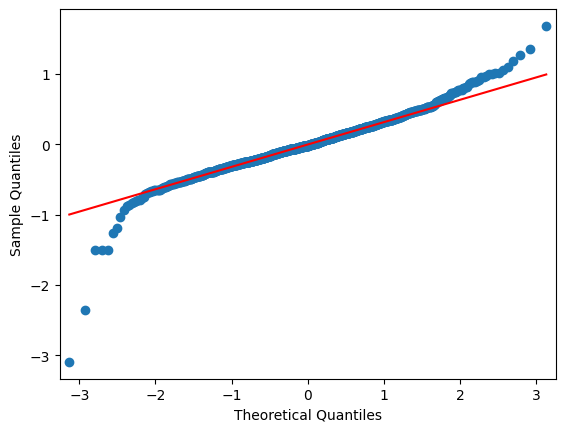

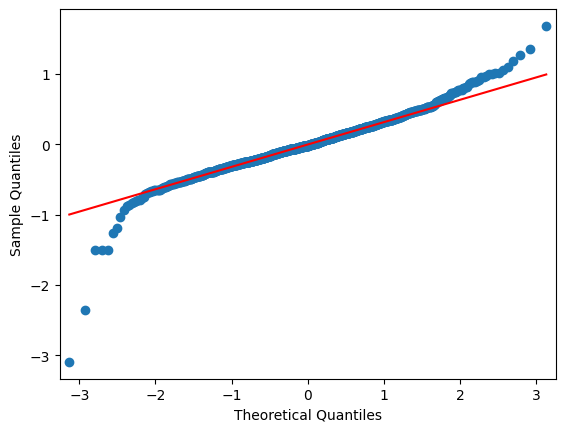

In [ ]:
sm.qqplot(model1.resid, line='q')

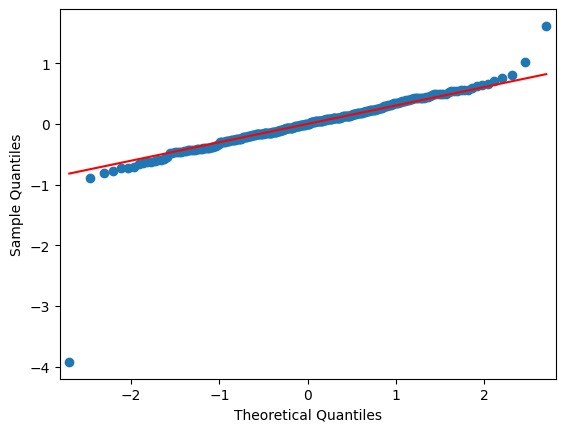

In [ ]:
sm.qqplot(first_model_df['resid'], line='q');

In [ ]:
second_model_df

,Y,Y_hat,resid
1245,-0.962145,-0.758525,-0.199120
204,0.215964,0.206713,0.001413
662,-0.338440,-0.649259,0.308031
543,0.617907,0.378045,0.240125
1267,-0.490902,-1.004880,0.525516
...,...,...,...
678,-0.213699,-0.225877,0.050934
745,-0.684943,-0.450132,-0.234445
991,-0.490902,-0.503059,0.015642
930,0.063503,-0.242795,0.319285


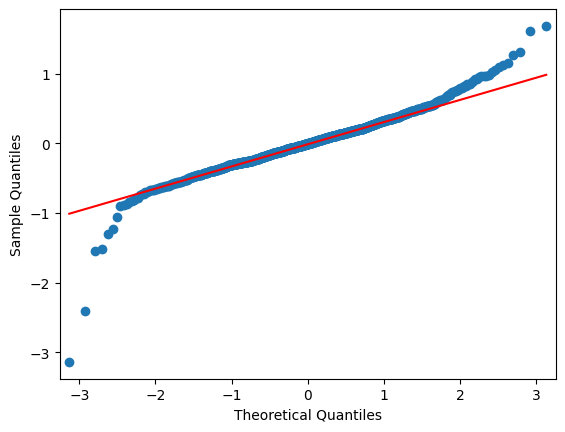

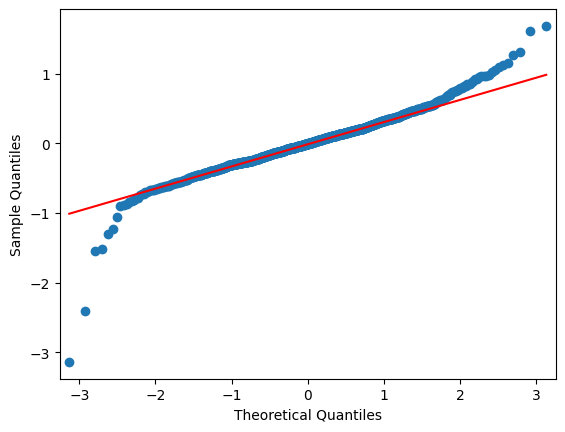

In [ ]:
sm.qqplot(model2.resid, line='q')

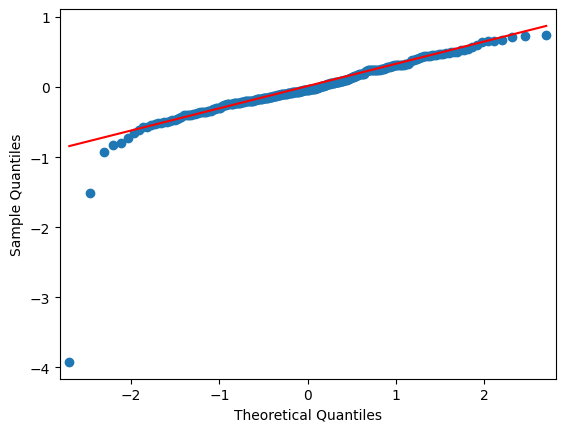

In [ ]:
sm.qqplot(second_model_df['resid'], line='q');

In [ ]:
third_model_df

,Y,Y_hat,resid
1366,-0.490902,-0.781331,0.290429
458,0.074591,-0.037880,0.112470
816,-0.227560,-0.302821,0.075261
1201,-1.045306,-0.837032,-0.208274
559,0.063503,0.065752,-0.002250
...,...,...,...
392,-1.738311,-0.543557,-1.194755
567,0.063503,0.354473,-0.290970
948,-0.338440,-0.257874,-0.080567
953,-0.504762,-0.287294,-0.217468


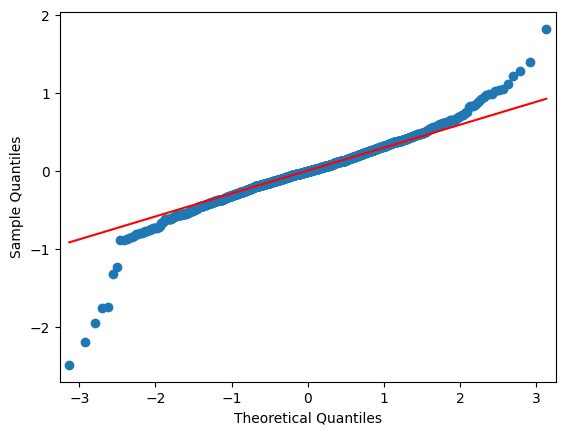

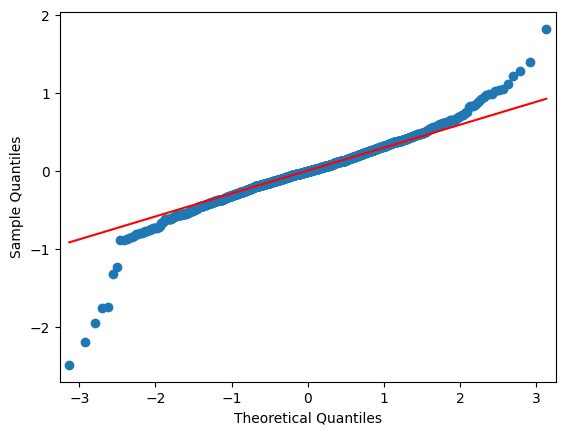

In [ ]:
sm.qqplot(model3.resid, line='q')

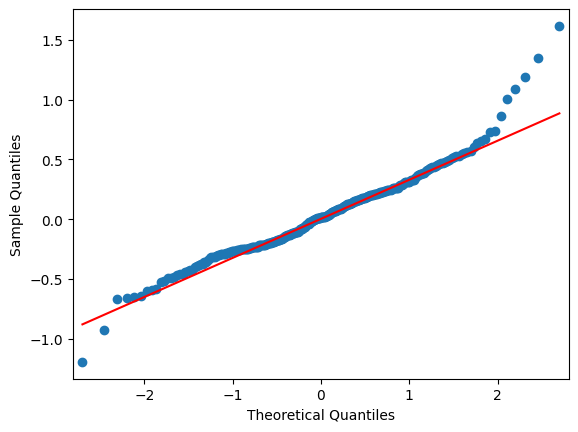

In [ ]:
sm.qqplot(third_model_df['resid'], line='q');

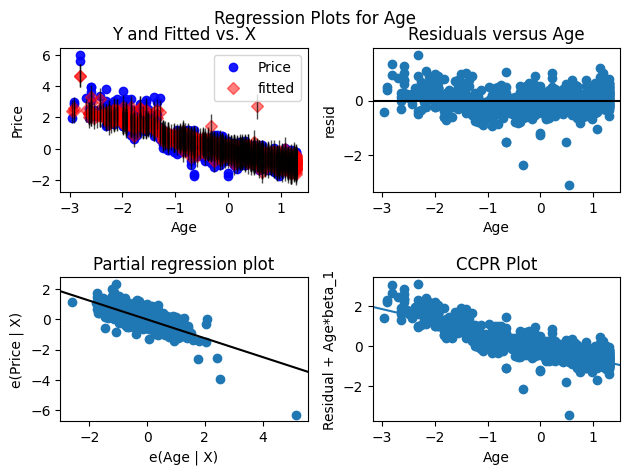

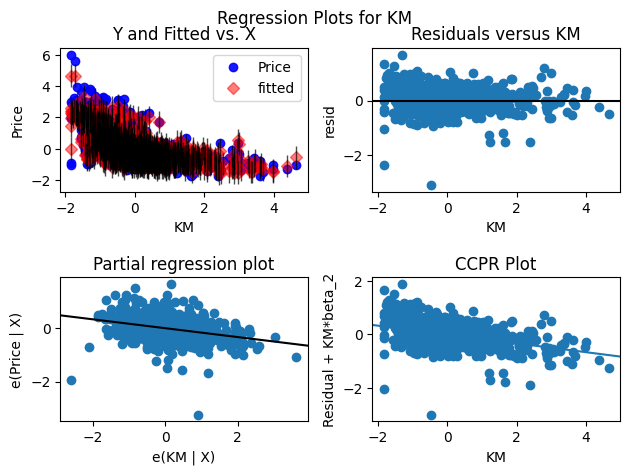

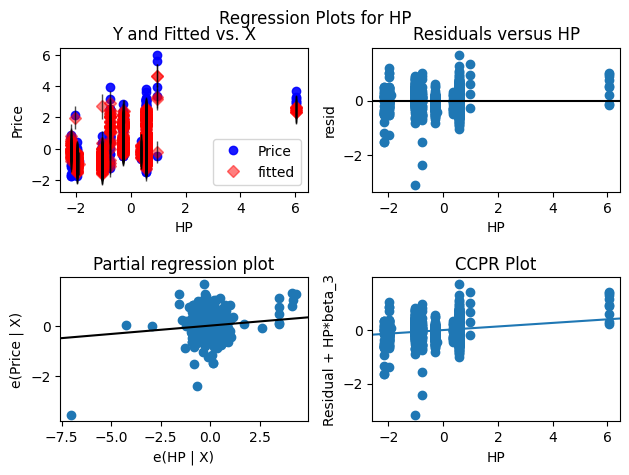

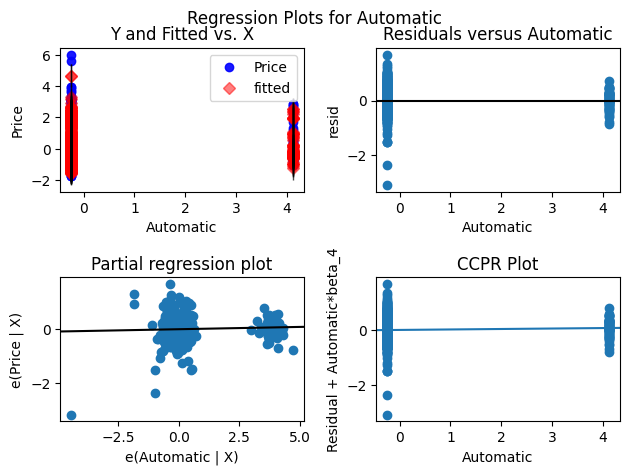

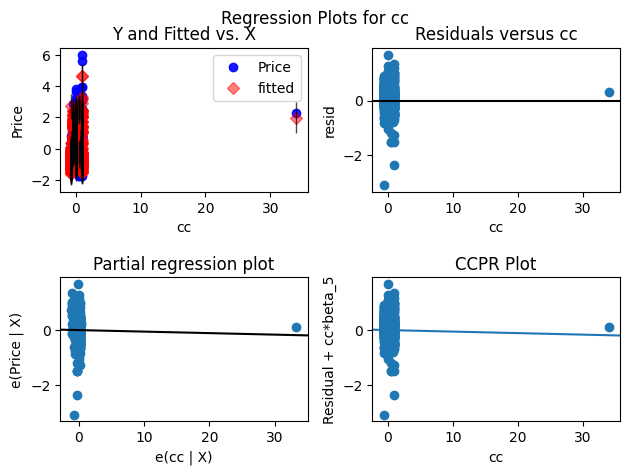

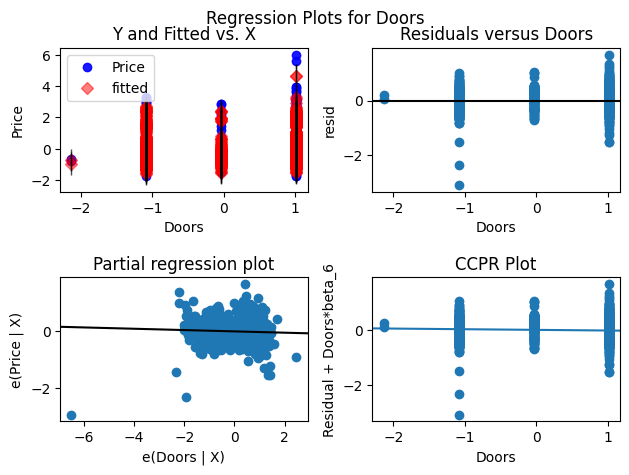

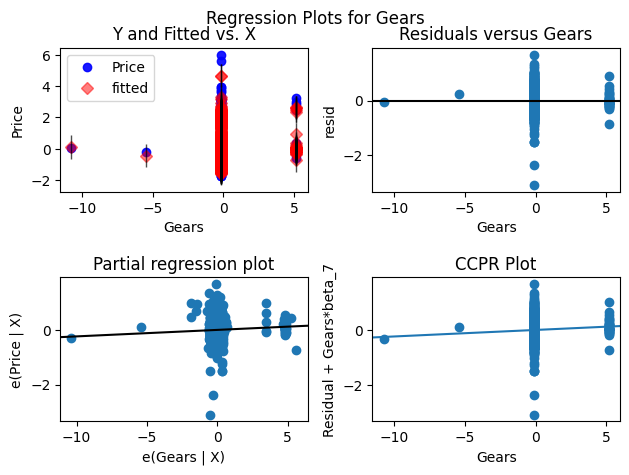

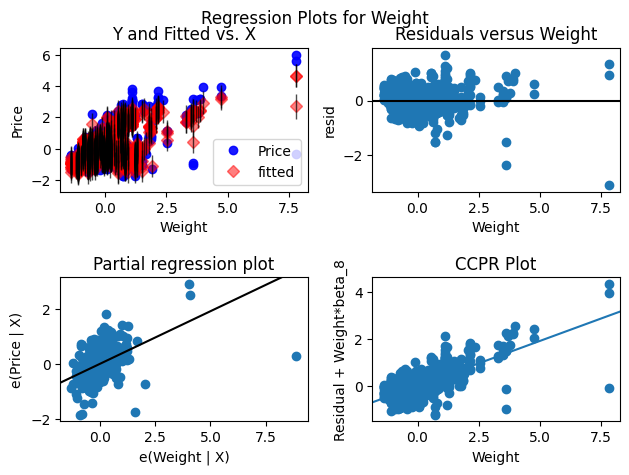

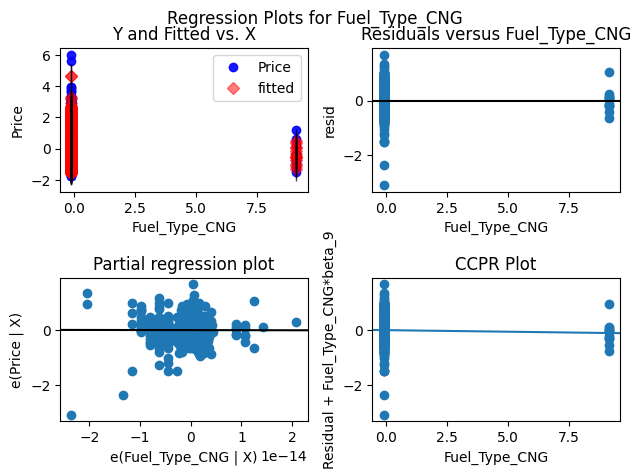

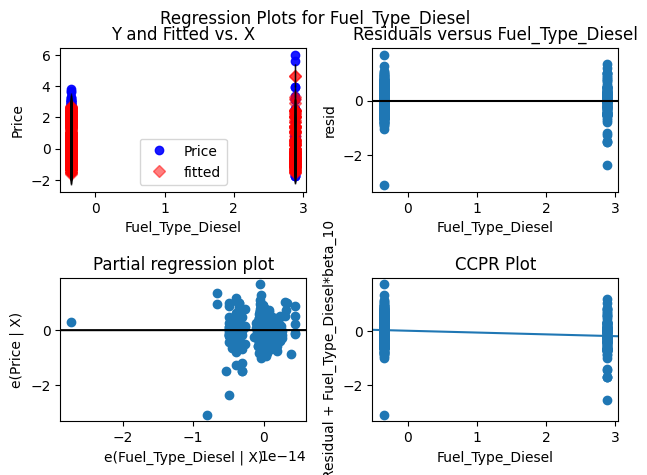

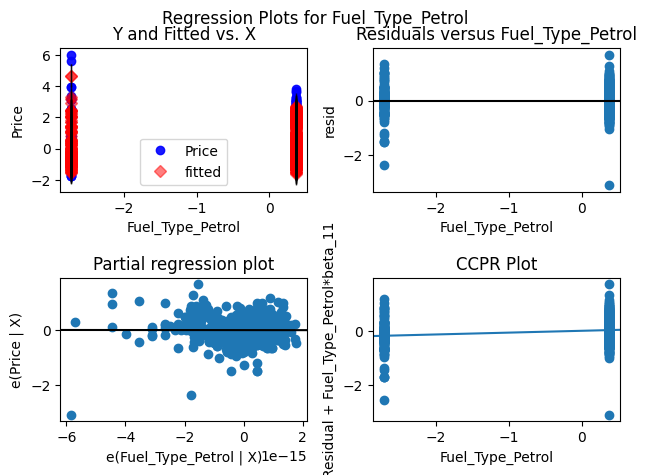

In [ ]:
# Regression plots for model 1
for i in toyota.columns:
    if i=='Price':
        continue
    else:
        sm.graphics.plot_regress_exog(model1,i)

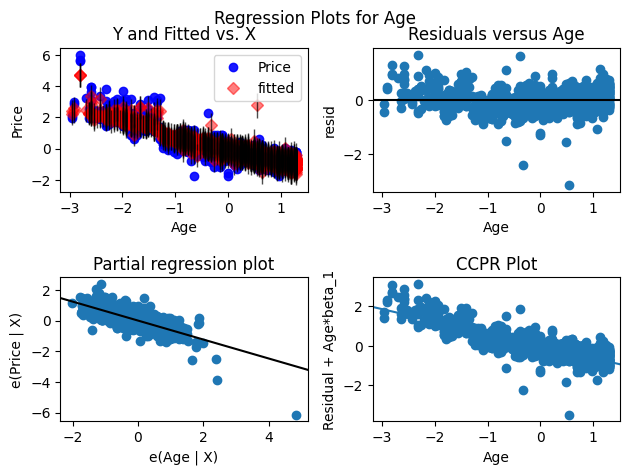

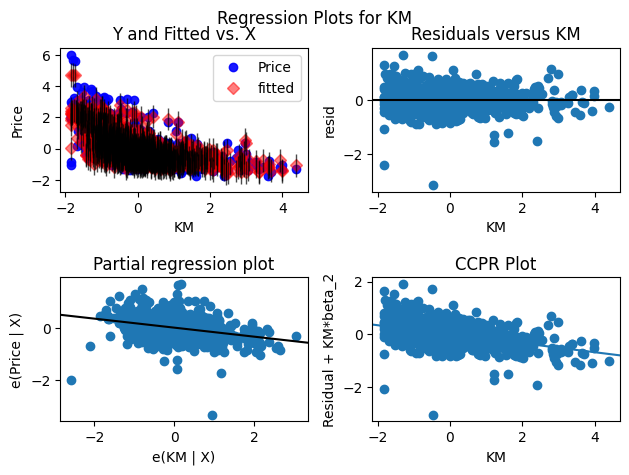

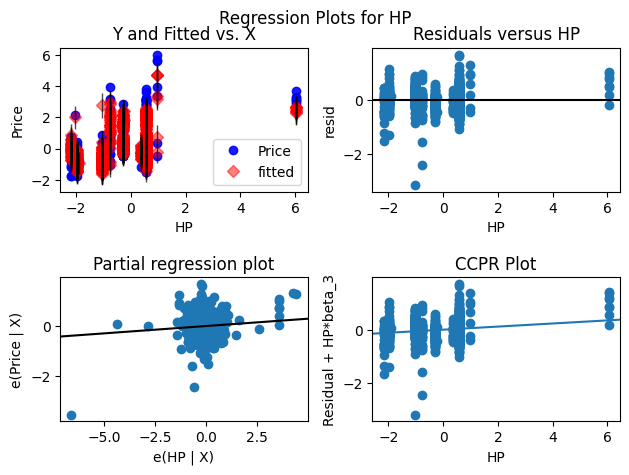

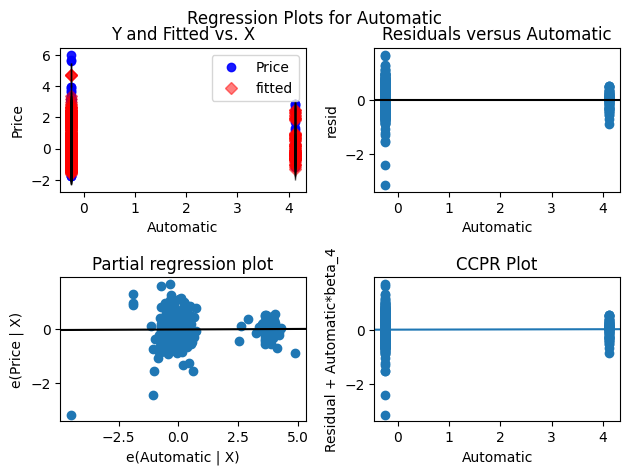

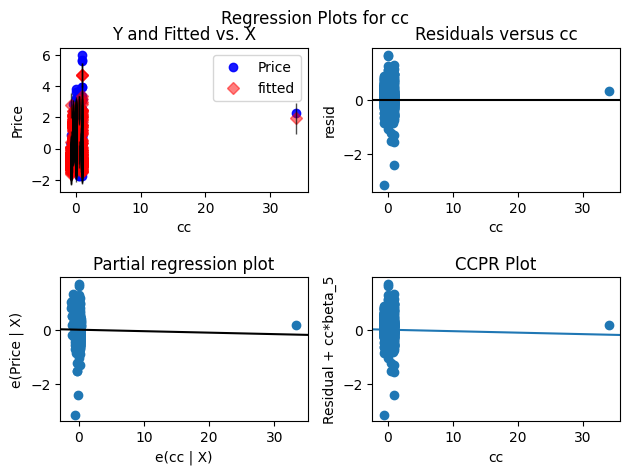

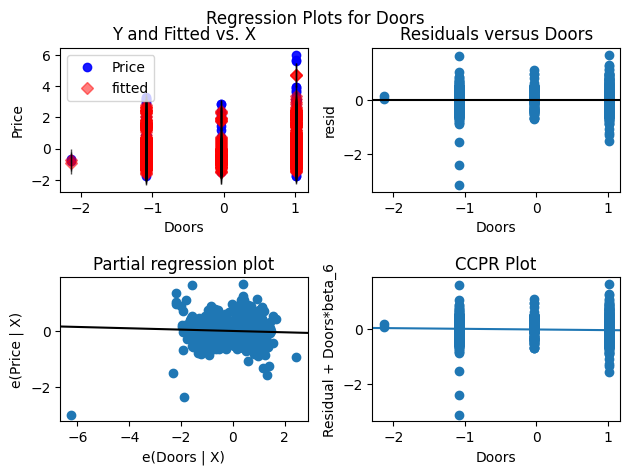

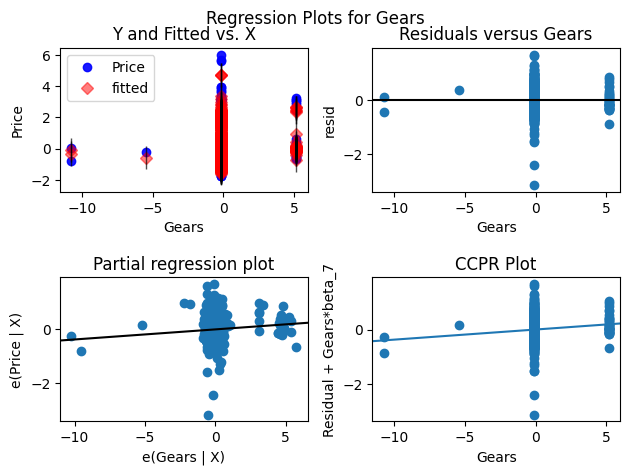

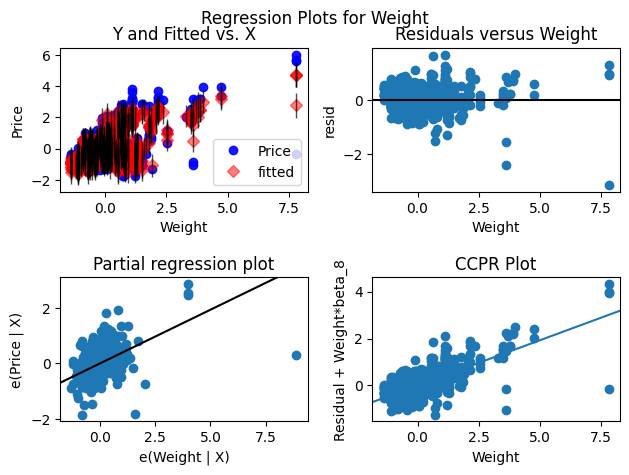

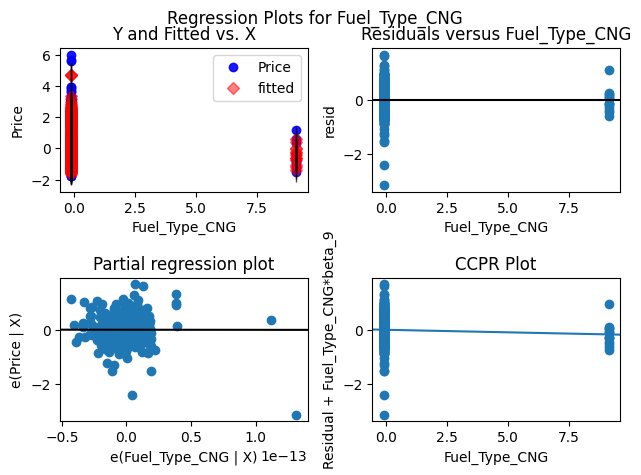

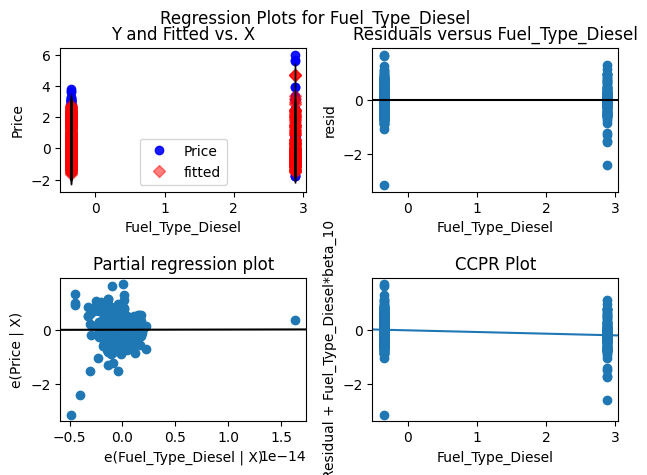

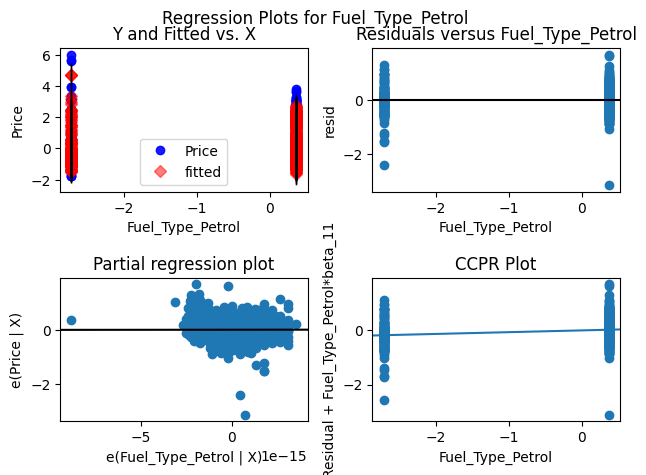

In [ ]:
for i in toyota.columns:
    if i=='Price':
        continue
    else:
        sm.graphics.plot_regress_exog(model2,i)

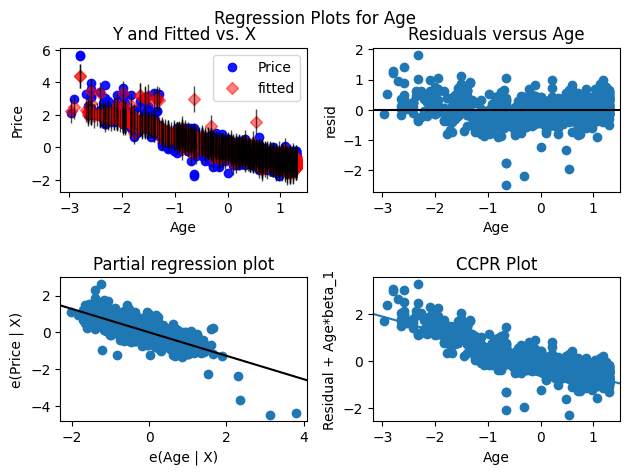

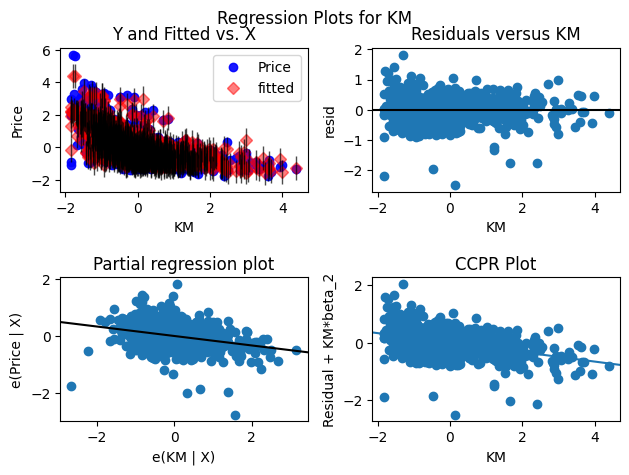

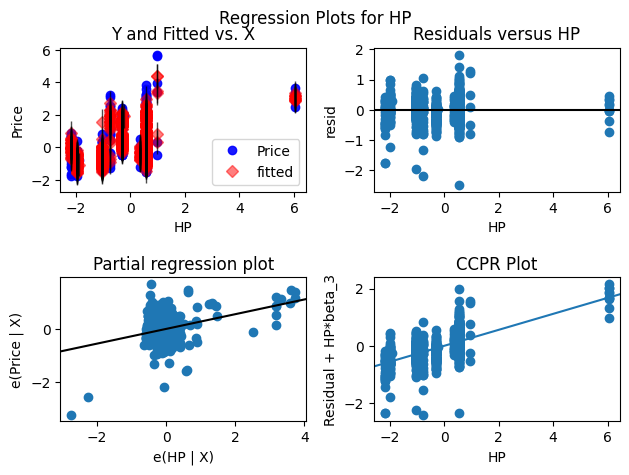

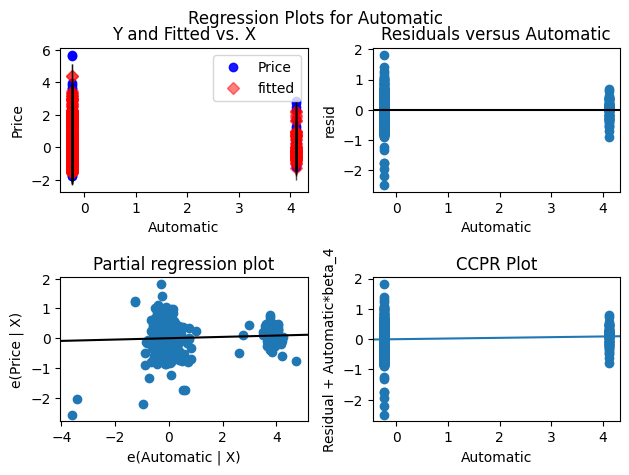

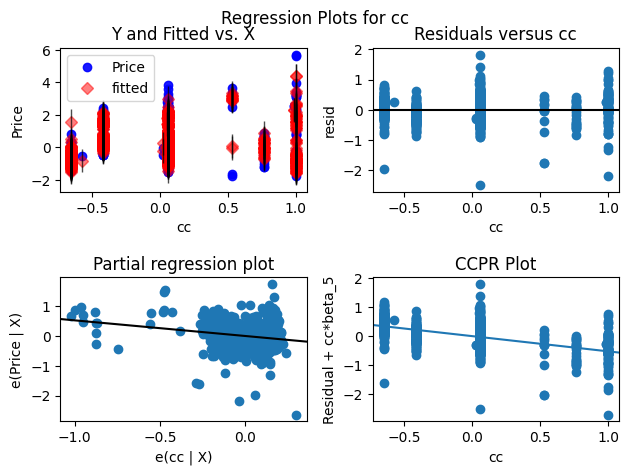

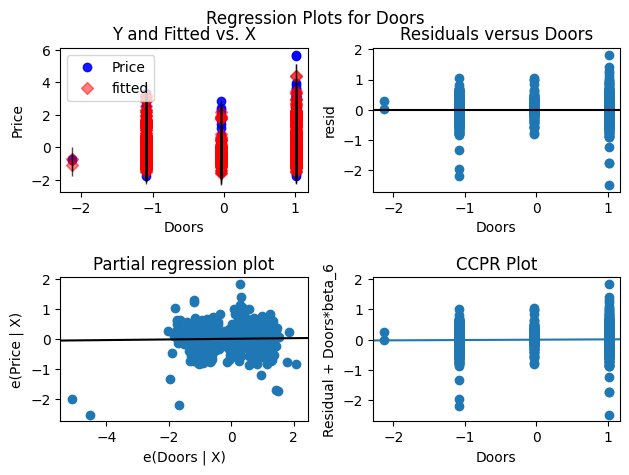

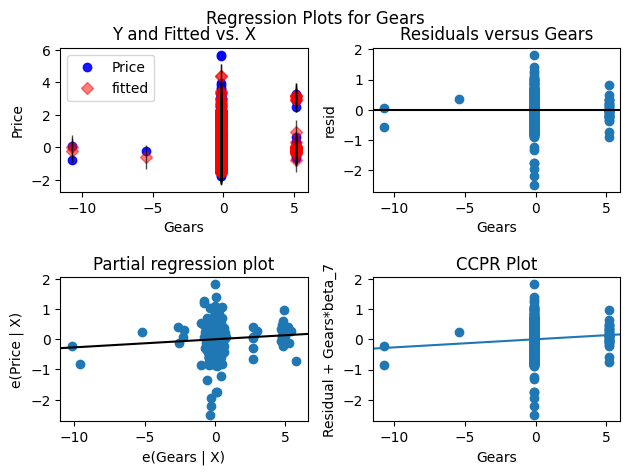

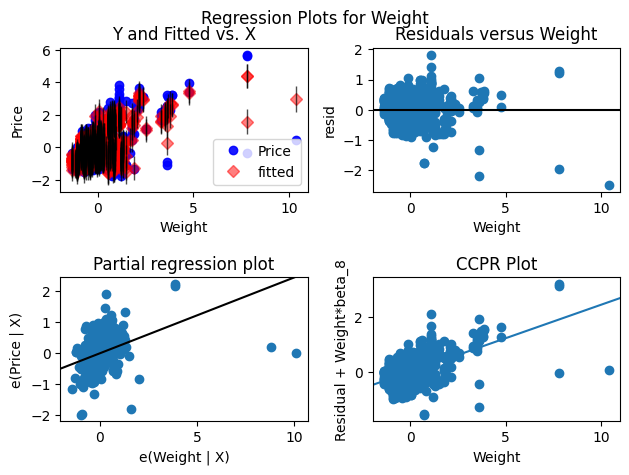

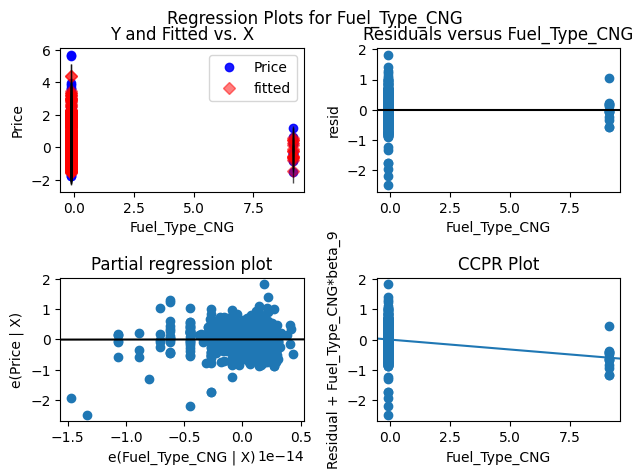

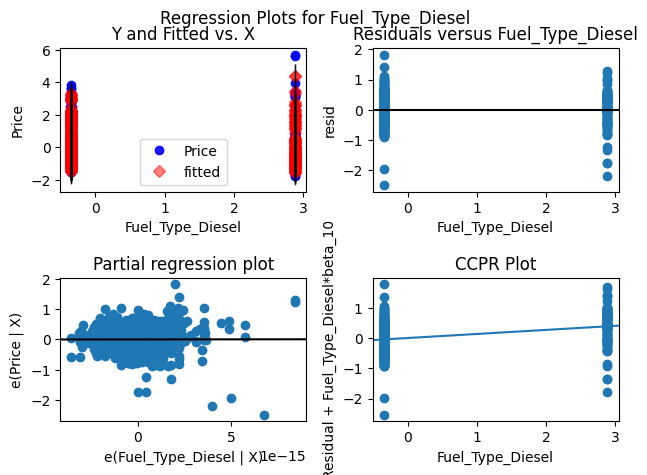

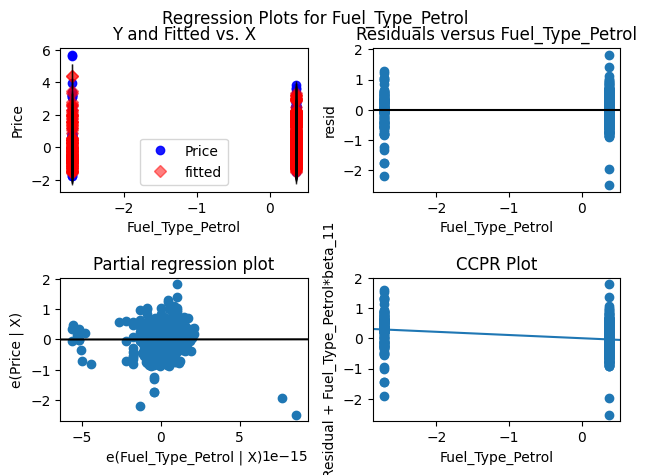

In [ ]:
for i in toyota.columns:
    if i=='Price':
        continue
    else:
        sm.graphics.plot_regress_exog(model3,i)

##5. Apply Lasso and Ridge methods on the model.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

#Lasso Regression
model1_lasso = Lasso(alpha = 0.1)
model1_lasso.fit(X_train_1, Y_train_1)

model2_lasso = Lasso(alpha = 0.1)
model2_lasso.fit(X_train_2, Y_train_2)

model3_lasso = Lasso(alpha = 0.1)
model3_lasso.fit(X_train_3, Y_train_3)

#Ridge Regression
model1_ridge = Ridge(alpha = 0.1)  # Set the regularization parameter
model1_ridge.fit(X_train_1, Y_train_1)

model2_ridge = Lasso(alpha = 0.1)
model2_ridge.fit(X_train_2, Y_train_2)

model3_ridge = Lasso(alpha = 0.1)
model3_ridge.fit(X_train_3, Y_train_3)

Lasso(alpha=0.1)

In [ ]:
# Coefficients for Lasso and Ridge model-1
print("Lasso Coefficients:", model1_lasso.coef_)
print("Ridge Coefficients:", model1_ridge.coef_)

# Coefficients for Lasso and Ridge model-2
print("Lasso Coefficients:", model2_lasso.coef_)
print("Ridge Coefficients:", model2_ridge.coef_)

# Coefficients for Lasso and Ridge model-3
print("Lasso Coefficients:", model3_lasso.coef_)
print("Ridge Coefficients:", model3_ridge.coef_)

Lasso Coefficients: [-0.60875163 -0.14183009  0.06337866  0.          0.          0.
  0.          0.19409329 -0.         -0.          0.        ]
Ridge Coefficients: [-0.62354627 -0.16623751  0.06678109  0.01710512 -0.00553828 -0.0232306
  0.02377699  0.38160743 -0.01146153 -0.06615695  0.06703083]
Lasso Coefficients: [-0.60148874 -0.14435038  0.05364736  0.          0.          0.
  0.          0.20855648 -0.         -0.          0.        ]
Ridge Coefficients: [-0.60148874 -0.14435038  0.05364736  0.          0.          0.
  0.          0.20855648 -0.         -0.          0.        ]
Lasso Coefficients: [-0.61941928 -0.12389392  0.0740536   0.          0.          0.
  0.          0.16146969 -0.         -0.          0.        ]
Ridge Coefficients: [-0.61941928 -0.12389392  0.0740536   0.          0.          0.
  0.          0.16146969 -0.         -0.          0.        ]


In [ ]:
from sklearn.metrics import mean_squared_error
linear_reg_mse_model1 = mean_squared_error(Y_test_1, model1.predict(X_test_1))
print("Linear Regression MSE for model1 : ", linear_reg_mse_model1)
linear_reg_mse_model2 = mean_squared_error(Y_test_2, model2.predict(X_test_2))
print("Linear Regression MSE for model2 : ", linear_reg_mse_model2)
linear_reg_mse_model3 = mean_squared_error(Y_test_3, model3.predict(X_test_3))
print("Linear Regression MSE for model3 : ", linear_reg_mse_model3)

Linear Regression MSE for model1 :  0.16564073190660394
Linear Regression MSE for model2 :  0.15288985200490923
Linear Regression MSE for model3 :  1.2854990996332065


In [ ]:
ridge_reg_mse_model1 = mean_squared_error(Y_test_1, model1_ridge.predict(X_test_1))
print("Ridge Regression MSE for model1 : ", ridge_reg_mse_model1)
ridge_reg_mse_model2 = mean_squared_error(Y_test_2, model2_ridge.predict(X_test_2))
print("Ridge Regression MSE for model2 : ", ridge_reg_mse_model2)
ridge_reg_mse_model3 = mean_squared_error(Y_test_3, model3_ridge.predict(X_test_3))
print("Ridge Regression MSE for model3 : ", ridge_reg_mse_model3)

Ridge Regression MSE for model1 :  0.1656157539535416
Ridge Regression MSE for model2 :  0.13950079090513767
Ridge Regression MSE for model3 :  0.17352895359501466


In [ ]:
lasso_reg_mse_model1 = mean_squared_error(Y_test_1, model1_lasso.predict(X_test_1))
print("Lasso Regression MSE for model1 : ", lasso_reg_mse_model1)
lasso_reg_mse_model2 = mean_squared_error(Y_test_2, model1_lasso.predict(X_test_2))
print("Lasso Regression MSE for model2 : ", lasso_reg_mse_model2)
lasso_reg_mse_model3 = mean_squared_error(Y_test_3, model1_lasso.predict(X_test_3))
print("Lasso Regression MSE for model3 : ", lasso_reg_mse_model3)

Lasso Regression MSE for model1 :  0.15101783252437004
Lasso Regression MSE for model2 :  0.13663365171717345
Lasso Regression MSE for model3 :  0.1618307092238412


Hence, we can see the differences, these Ridge and Lasso regression model improves the linear regression model by reducing the mean squared errors in all of the models

# Interview Questions
1. What is Normalization & Standardization and how is it helpful?

Ans. Normalization and Standardization are the feature scaling methods. By using these procedures we can make our model more precise and more efficient. It also helps in managing outliers present in data. The purpose of this is to distribute the data features evenly and in a similar range so that there is no dominance from the variables which have outlier values.
- Normalization transforms the whole data to (0,1), Formula is given by $X = \dfrac{(X_i - X.min())}{(X.max() - X.min())}$
- Standardization transforms the whole data to centered around the mean with a unit standard deviation. The range mostly turns in (-3,3). Formula is given by $Z = \dfrac{(X - \mu)}{\sigma}$

2. What techniques can be used to adress multicollinearity in multiple linear regression?

ANs. To address multicollinearity, techniques such as regularization or feature selection can be applied to select some of the independent variables that are not highly correlated with each other so that it does not affects the model.
- We can detect the multicollinearity using the correlation matrix or by using $VIF = \dfrac{1}{1-R_i^2}$.
- Using these methods, after we find the higly collinear variables, we need to check which variable is most significant, so accordingly we need to include the subset for model improvement
- We can use R-Square values or AIC values for best subset selection.